In [25]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
df = pd.read_csv('/content/drive/MyDrive/week2_python_task/heart_failure_clinical_records_dataset.csv')

In [28]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
df.info()
print()
print(f'Shape of the dataset')
print(f'Number of Columns: {df.shape[1]}')
print(f'Number of Rows: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

Shape of the data

In [30]:
df.isnull().sum() #checking null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

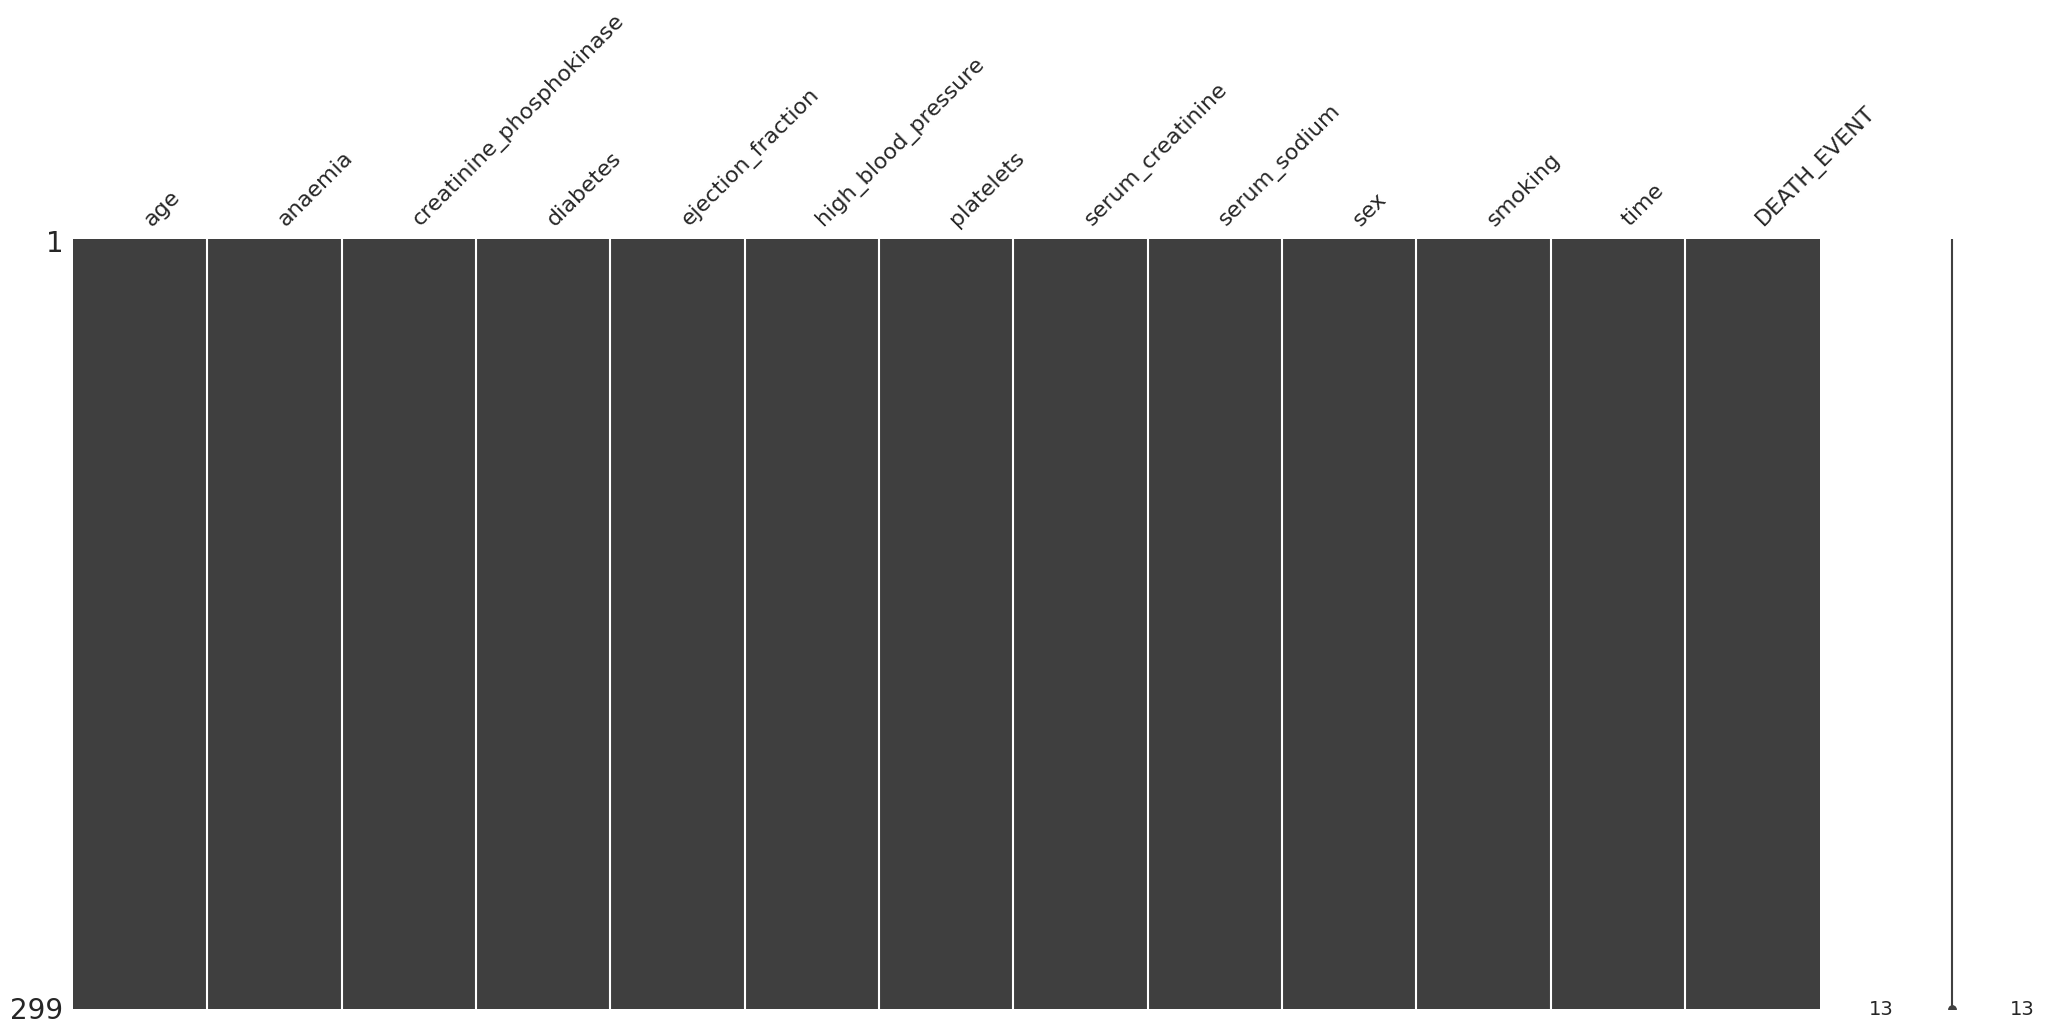

In [31]:
missingno.matrix(df, fontsize = 16)  #plotting to check null values
plt.show()

In [32]:
df.nunique() #check unique values

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [33]:
df.duplicated().sum() #check for duplicated

0

In [34]:
df.rename(columns={'sex':'gender'},inplace = True) #changing the column name to gender

In [35]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [36]:
data = df.describe()
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Text(0.5, 1.0, 'Diabetes')

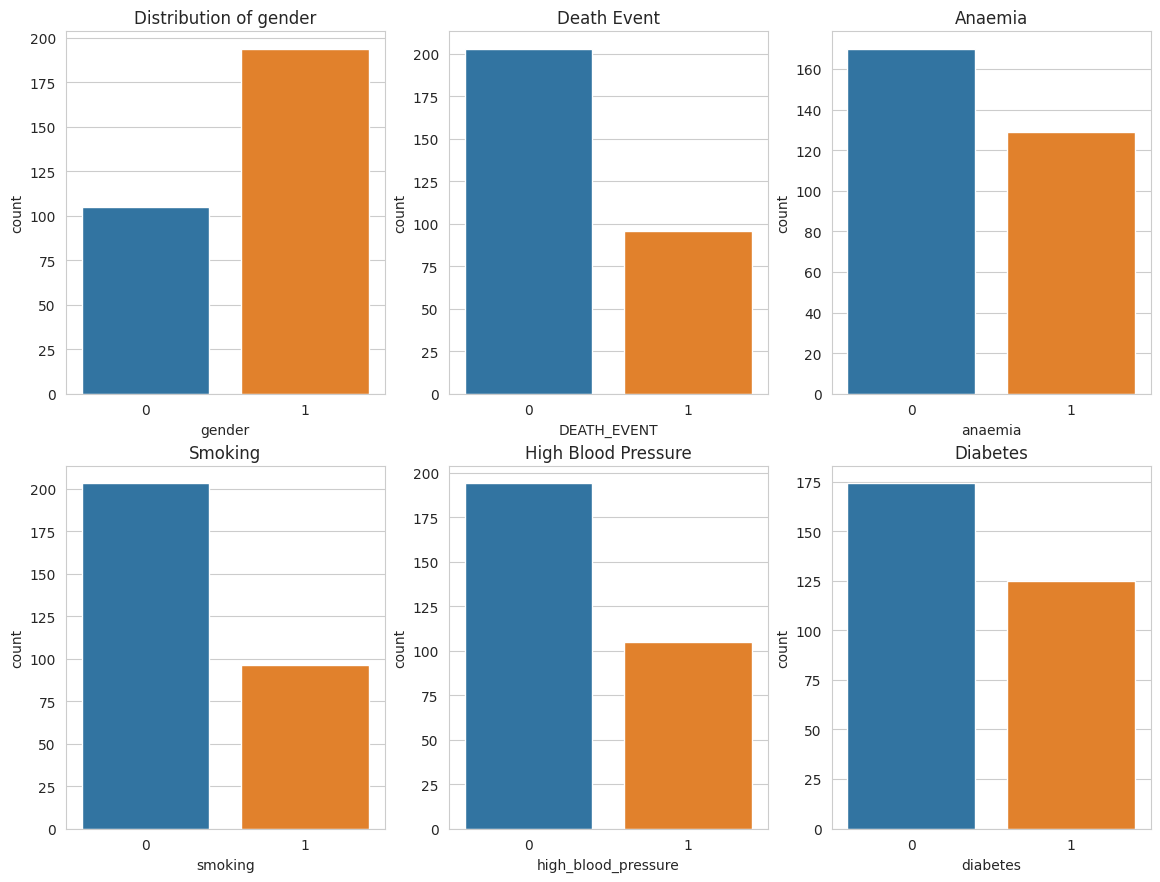

In [37]:
plt.figure(figsize=(14, 16))
#based on count

#plotting gender
plt.subplot(3, 3, 1)
sns.countplot(x='gender', data=df)
plt.title('Distribution of gender')
#plotting death event
plt.subplot(3, 3, 2)
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event')
#plotting anaemia
plt.subplot(3, 3, 3)
sns.countplot(x='anaemia', data=df)
plt.title('Anaemia')
#plotting smoking
plt.subplot(3, 3, 4)
sns.countplot(x='smoking', data=df)
plt.title('Smoking')
#plotting blood pressure range
plt.subplot(3, 3, 5)
sns.countplot(x='high_blood_pressure', data=df)
plt.title('High Blood Pressure')
#plotting diabetes values
plt.subplot(3, 3, 6)
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes')

Text(0.5, 1.0, 'Serum_Sodium')

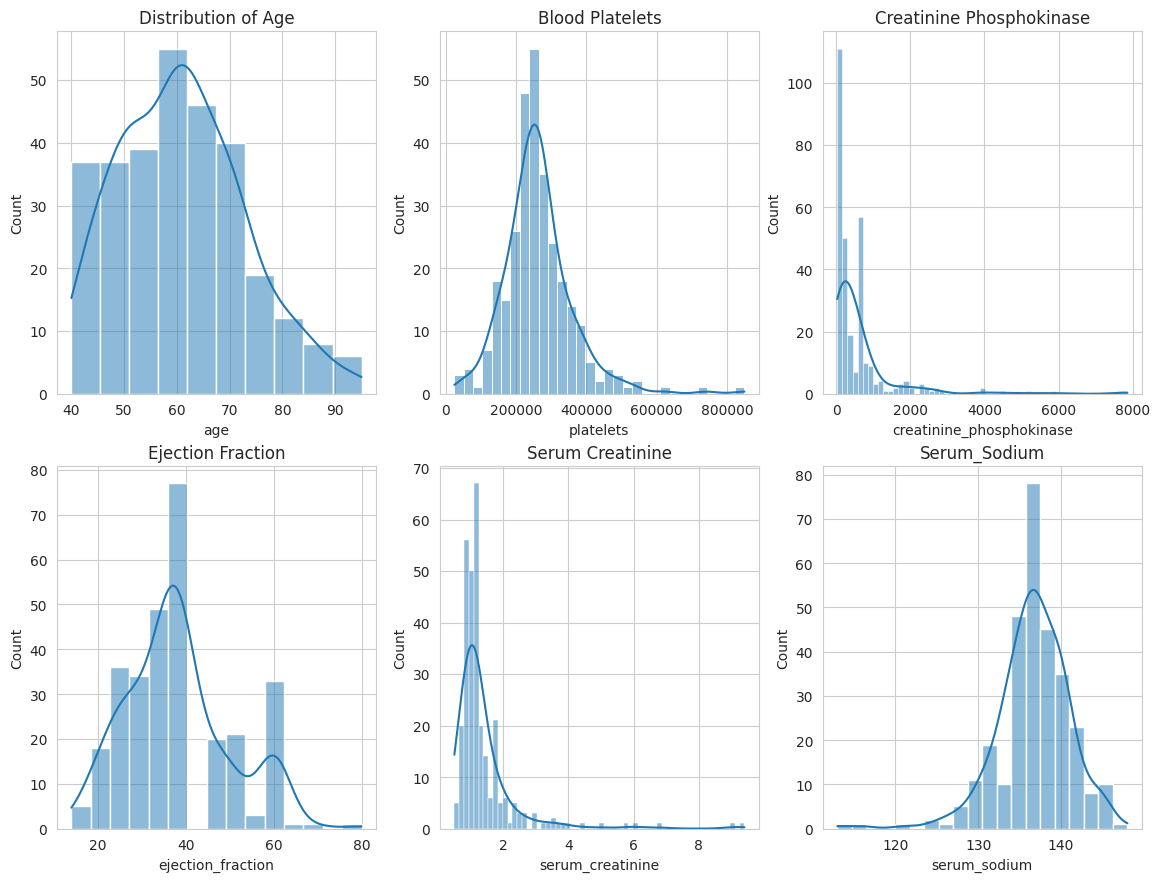

In [38]:
plt.figure(figsize=(14, 16))
#based on count

#plotting distribution of age
plt.subplot(3, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')

#plotting blood platelets
plt.subplot(3, 3, 2)
sns.histplot(df['platelets'], kde=True)
plt.title('Blood Platelets')

#plotting creatinie phosphokinase
plt.subplot(3, 3, 3)
sns.histplot(df['creatinine_phosphokinase'], kde=True)
plt.title('Creatinine Phosphokinase')

#plotting ejection fraction
plt.subplot(3, 3, 4)
sns.histplot(df['ejection_fraction'], kde=True)
plt.title('Ejection Fraction')

#plotting serum creatinine
plt.subplot(3, 3, 5)
sns.histplot(df['serum_creatinine'], kde=True)
plt.title('Serum Creatinine')

#plotting serum sodium
plt.subplot(3, 3, 6)
sns.histplot(df['serum_sodium'], kde=True)
plt.title('Serum_Sodium')

Text(0.5, 1.0, 'Death Event accoding to Smoking')

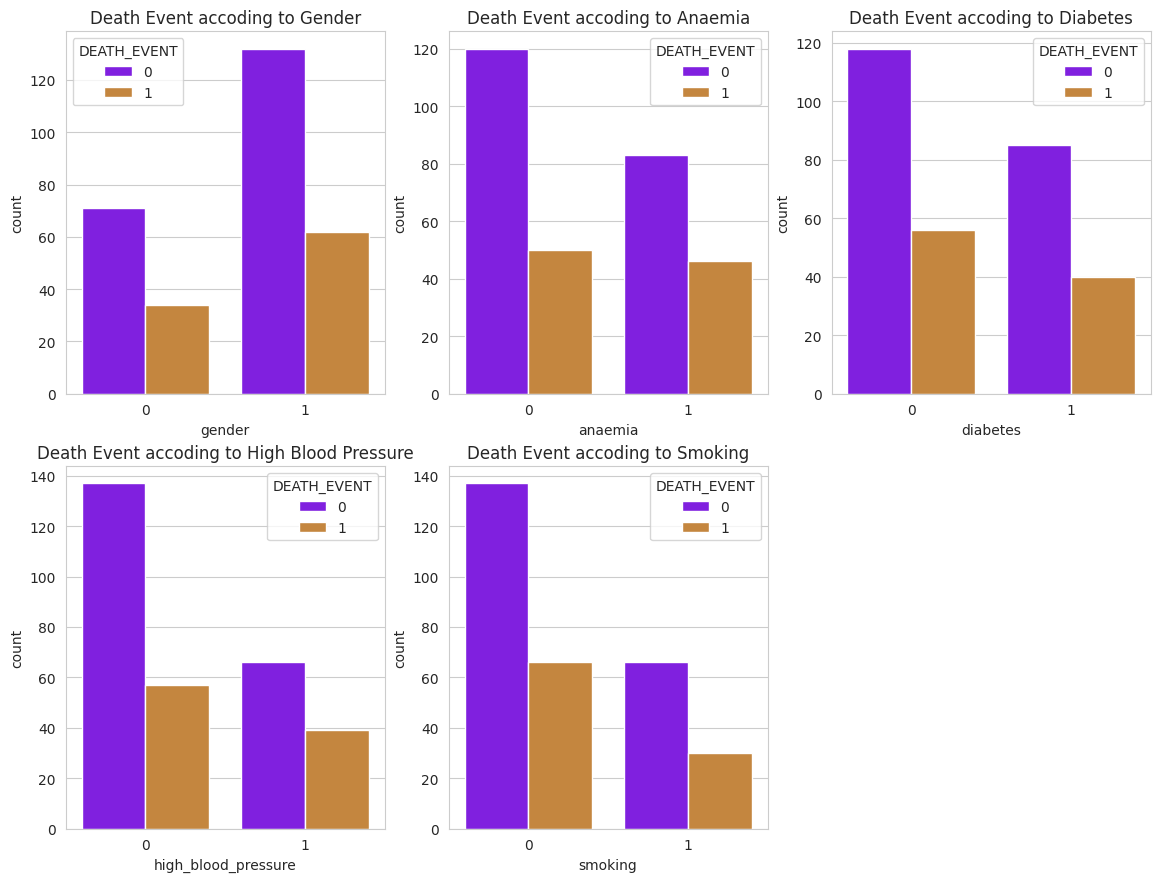

In [39]:
plt.figure(figsize=(14, 16))

#comparing death event with gender
plt.subplot(3, 3, 1)
sns.countplot(data=df,x='gender',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Gender')

#comparing death event with anaemia
plt.subplot(3, 3, 2)
sns.countplot(data=df,x='anaemia',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Anaemia')

#comparing death event with diabetes
plt.subplot(3, 3, 3)
sns.countplot(data=df,x='diabetes',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Diabetes')

#comparing death event with bp
plt.subplot(3, 3, 4)
sns.countplot(data=df,x='high_blood_pressure',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to High Blood Pressure')

#comparing death event with smoking
plt.subplot(3, 3, 5)
sns.countplot(data=df,x='smoking',palette=["#8000ff","#da8829"], hue='DEATH_EVENT')
plt.title('Death Event accoding to Smoking')

Text(0.5, 1.0, 'Distribution of Serum Sodium \nwith respect to Death Event')

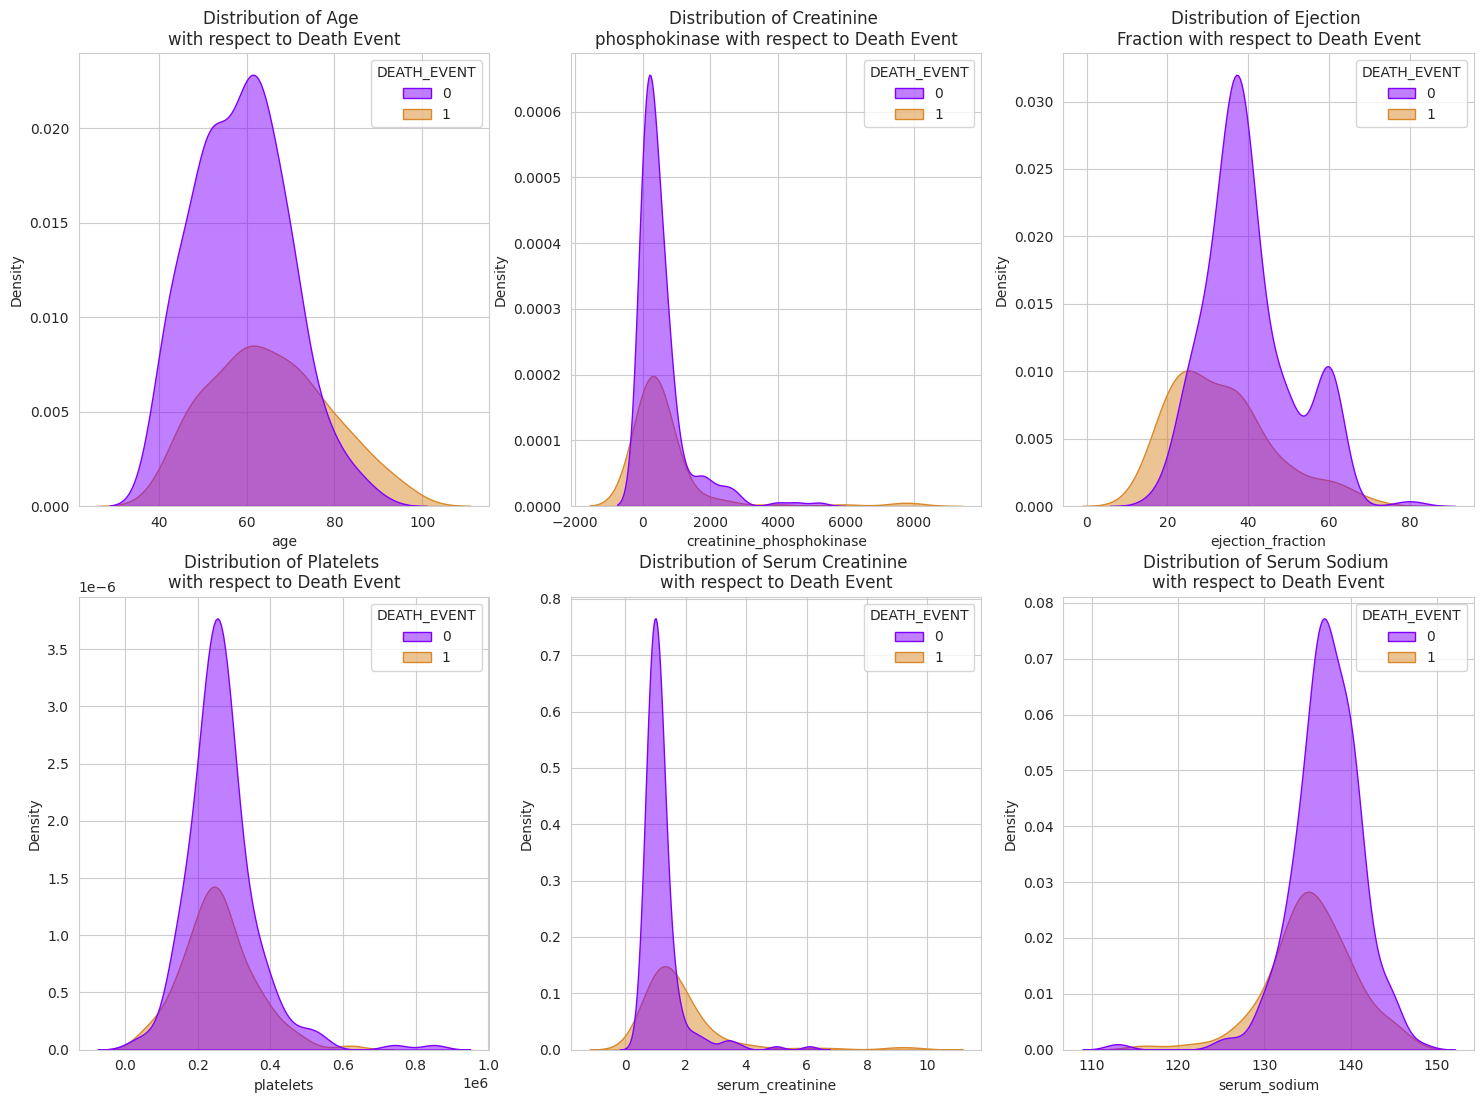

In [40]:
plt.figure(figsize=(18, 20))

#comparing death event with death event
plt.subplot(3, 3, 1)
sns.kdeplot(data=df, x='age',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Age \nwith respect to Death Event')

#comparing death event with creatinine phosphokinase
plt.subplot(3, 3, 2)
sns.kdeplot(data=df, x='creatinine_phosphokinase',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Creatinine \nphosphokinase with respect to Death Event')

#comparing death event with ejection fraction
plt.subplot(3, 3, 3)
sns.kdeplot(data=df, x='ejection_fraction',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Ejection \nFraction with respect to Death Event')

#comparing death event with platelets
plt.subplot(3, 3, 4)
sns.kdeplot(data=df, x='platelets',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Platelets \nwith respect to Death Event')

#comparing death event with serum creatinie
plt.subplot(3, 3, 5)
sns.kdeplot(data=df, x='serum_creatinine',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Serum Creatinine \nwith respect to Death Event')

#comparing death event with serum sodium
plt.subplot(3, 3, 6)
sns.kdeplot(data=df, x='serum_sodium',hue="DEATH_EVENT", fill=True,palette=["#8000ff","#da8829"], alpha=.5)
plt.title('Distribution of Serum Sodium \nwith respect to Death Event')

In [52]:
v=pd.crosstab(df["age"],df["DEATH_EVENT"]).reset_index()

v.columns=["age","low_risk","high_risk"]

px.line(v,v["age"],v["high_risk"],title="RISK OF HIGH DEATH EVENT WITH AGE")

People at the age of 58 to 60 have high death rate.

In [53]:
px.line(v,v["age"],v["low_risk"],title="RISK OF LOW DEATH_EVENT WITH AGE")

people at the range of 48 to 52, 58 to 61 and 68 to 73 have low death rate

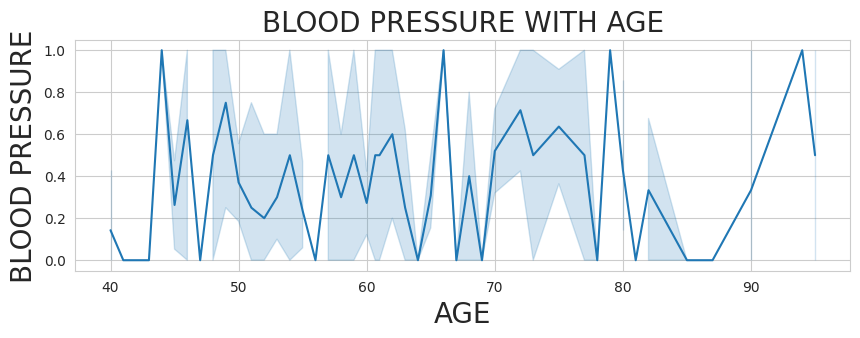

In [57]:
plt.figure(figsize=(10,3))
sns.lineplot(y="high_blood_pressure",x="age",data=df)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

BP is high for people between the age of 45 to 48,65 to 68 and at near 80s.

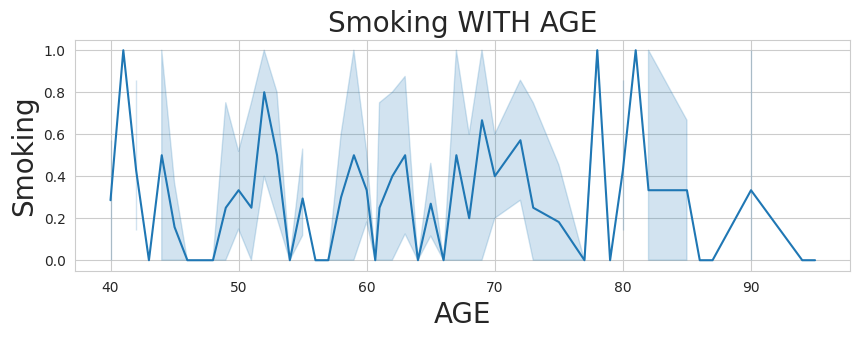

In [59]:
plt.figure(figsize=(10,3))
sns.lineplot(y="smoking",x="age",data=df)
plt.title("Smoking WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("Smoking",fontsize=20)
plt.show()

People with age between 40 to 45 and 75 to 80 are smoking more.

Text(0.5, 1.0, 'Anaemia')

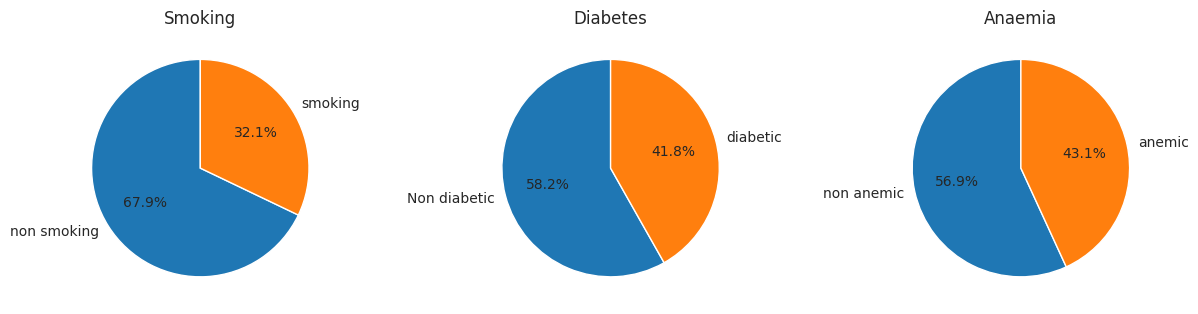

In [42]:
plt.figure(figsize=(15, 12))

#barplot for smoking
plt.subplot(3, 3, 1)
data_pie = df["smoking"].value_counts().rename_axis("smoking").reset_index(name='counts')
labels = ["non smoking","smoking"]
plt.pie(data_pie.counts, labels=labels, startangle=90, autopct='%.1f%%')
plt.title("Smoking")

#barplot for diabetes
plt.subplot(3, 3, 2)
data_pie = df["diabetes"].value_counts().rename_axis("diabetes").reset_index(name='counts')
plt.pie(data_pie.counts, labels = ["Non diabetic","diabetic"] ,startangle=90, autopct='%.1f%%')
plt.title("Diabetes")

#barplot for anaemia
plt.subplot(3, 3, 3)
data_pie = df["anaemia"].value_counts().rename_axis("anaemia").reset_index(name='counts')
plt.pie(data_pie.counts, labels = ["non anemic","anemic"] ,startangle=90, autopct='%.1f%%')
plt.title("Anaemia")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


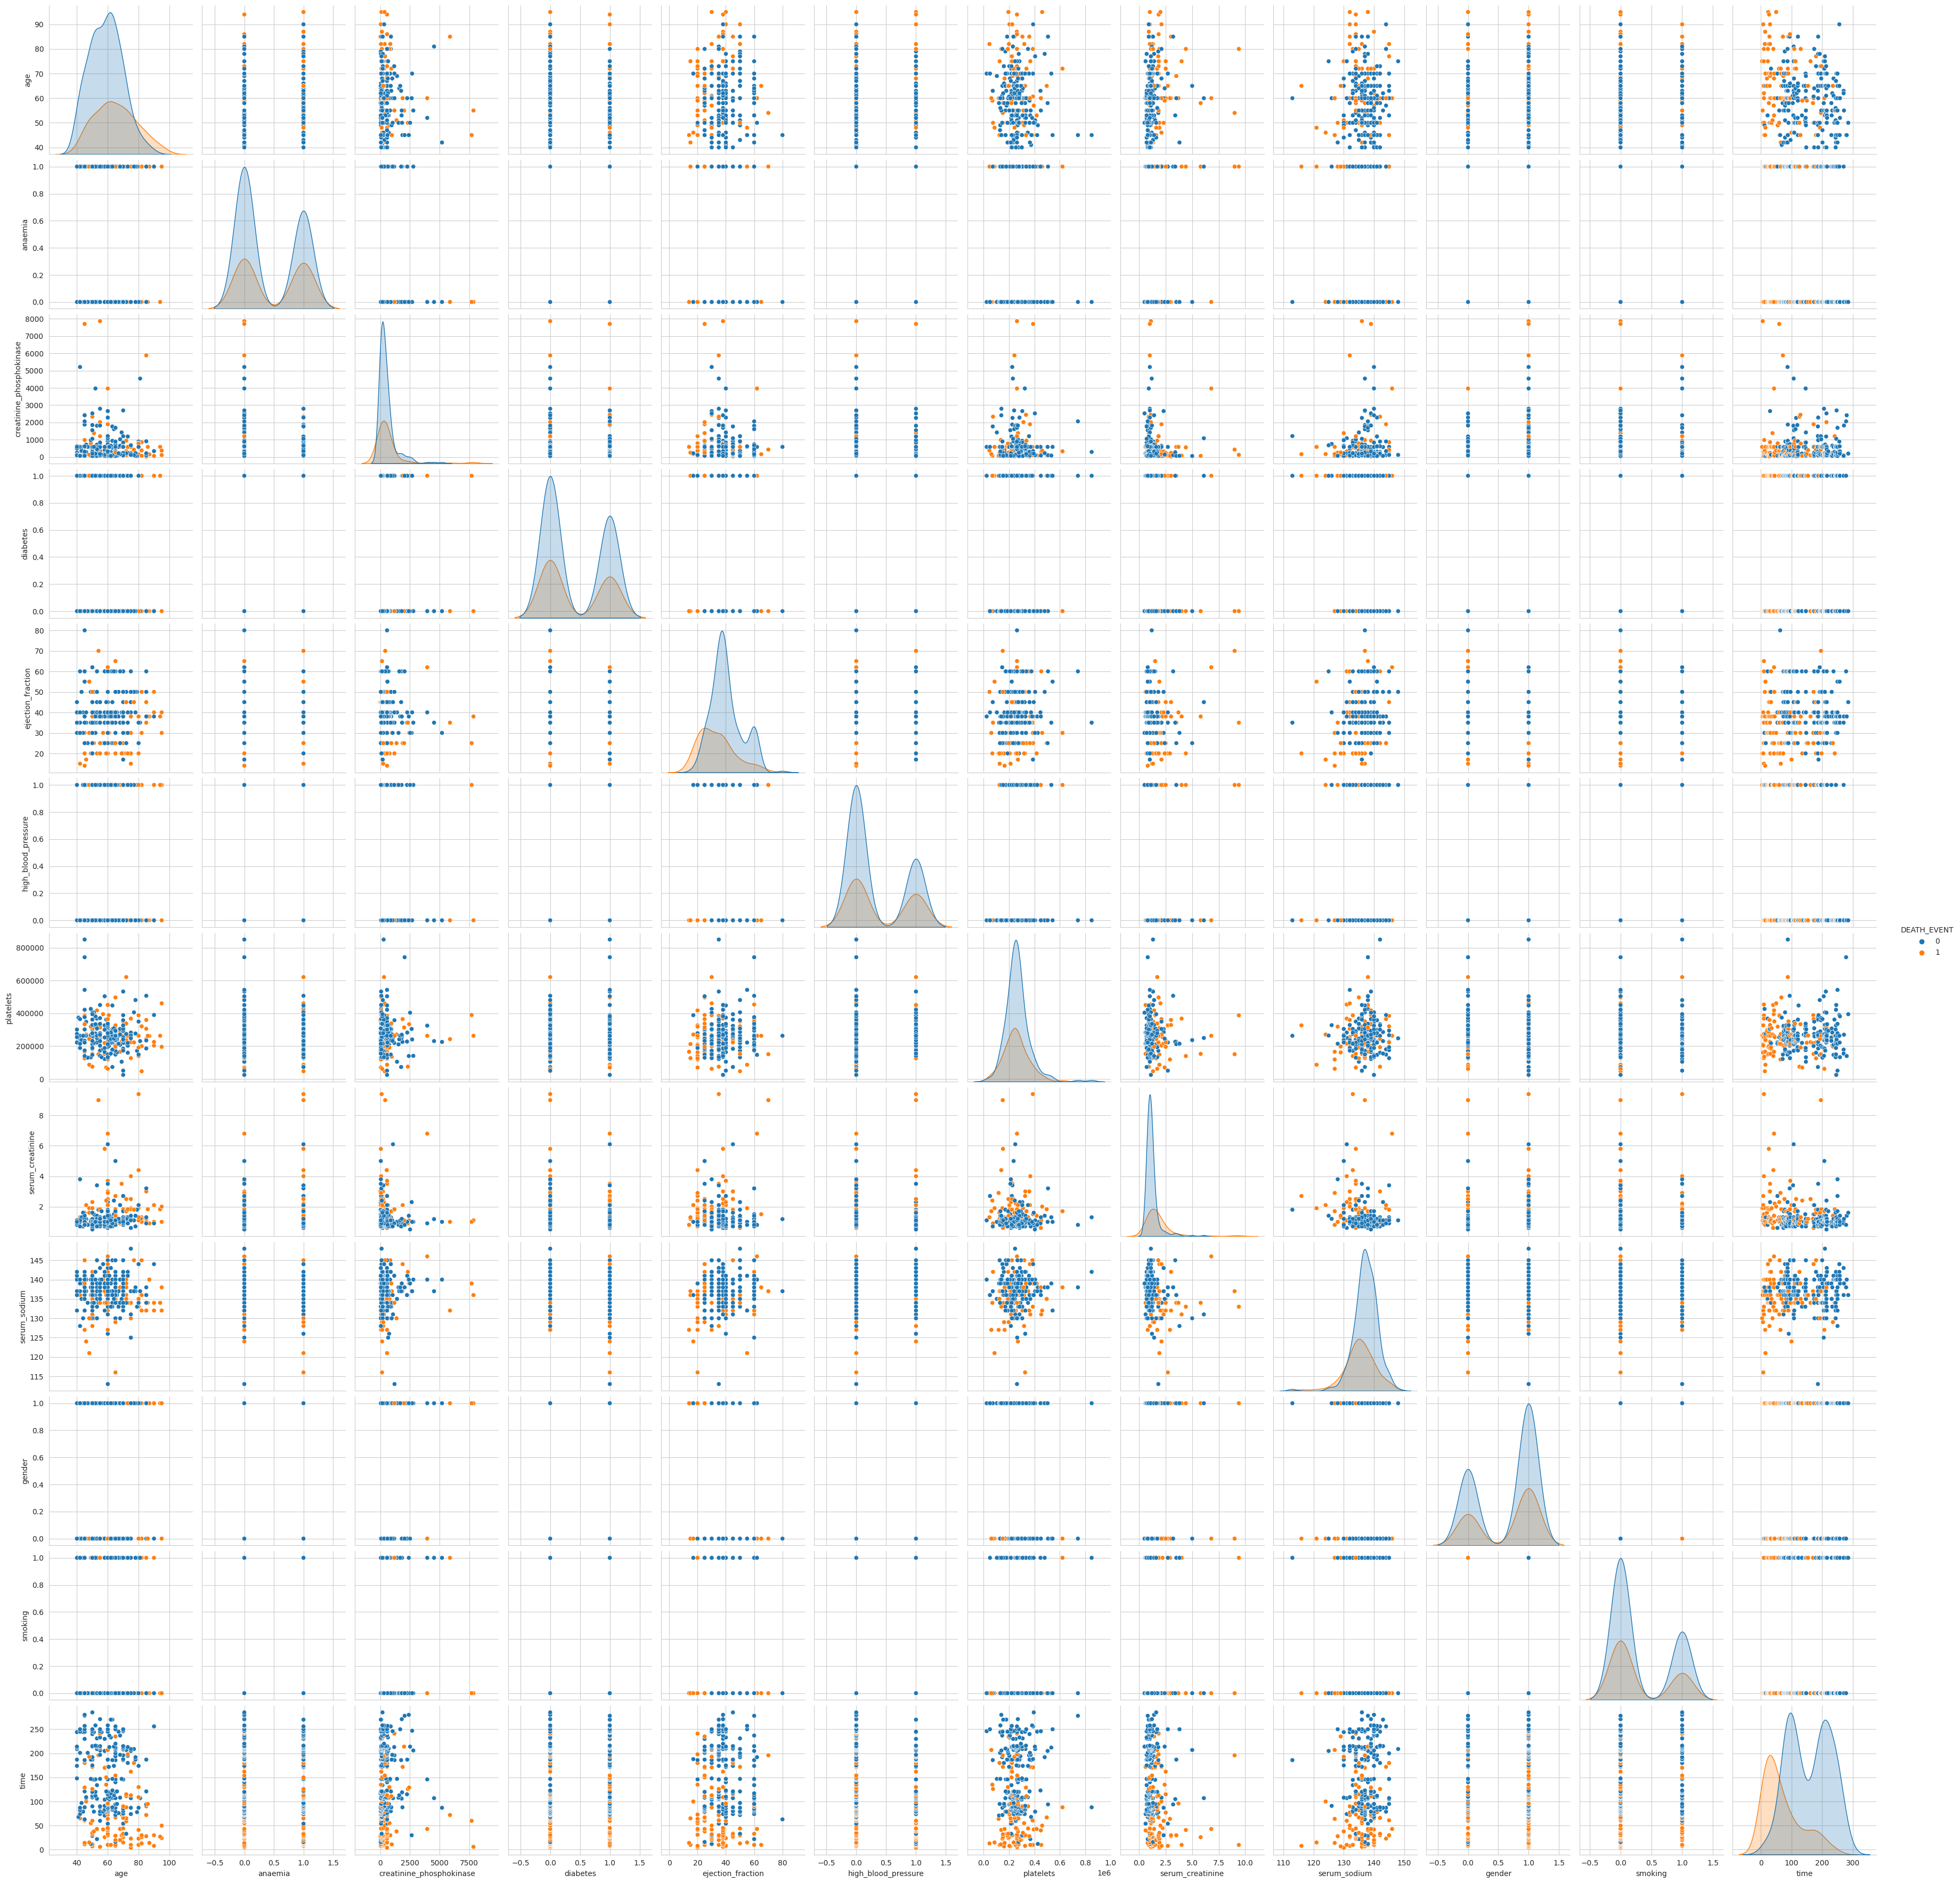

In [41]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="DEATH_EVENT", size=3);  #pairplot based on death event
plt.show()

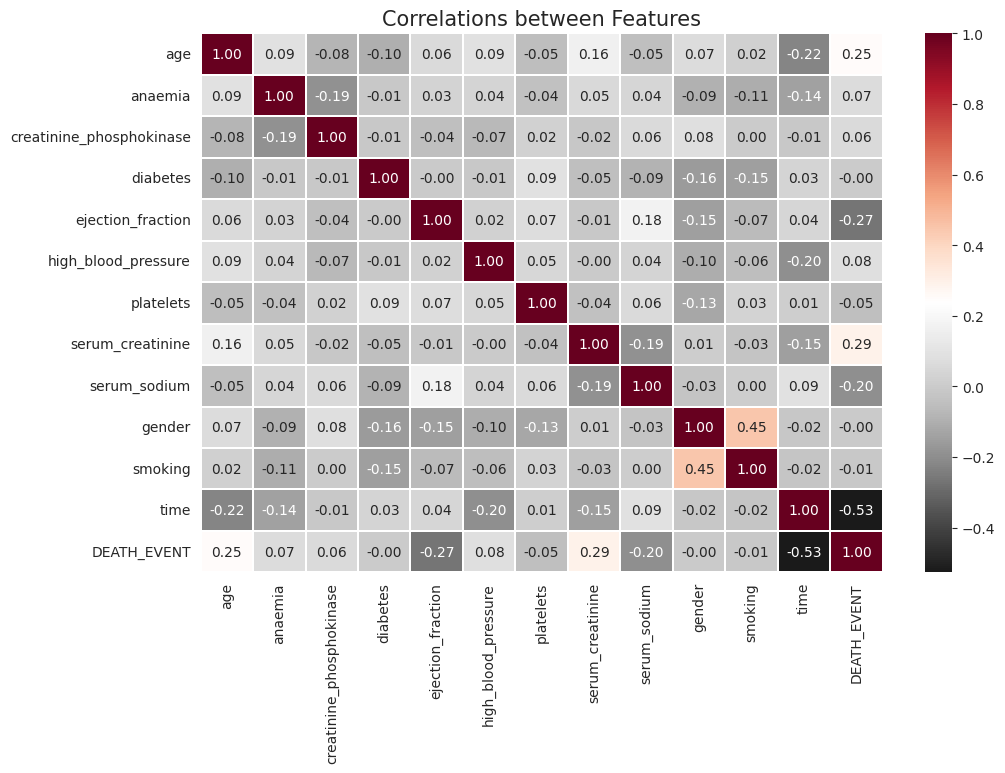

In [45]:
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
plt.title('Correlations between Features', fontsize=15)
plt.show()